# LAB 06 - 데이터 분포 집계 예제


### #01.준비작업
#### 1-1 패키지 참조

In [23]:
from hossam import load_data
#글꼴을 시스템에 등록
from matplotlib import font_manager as fm
#캔버스 생성, 기본 그래픽 함수 제공
from matplotlib import pyplot as plt
#고급 그래픽 기능 제공
import seaborn as sb



#### 1-2 그래프 초기화

In [24]:
#한글을 지원하는 폰트 파일의 경로
font_path ='./NotoSansKR-Regular.ttf'
#폰트의 그룹을 시스템에 등록
fm.fontManager.addfont(font_path)
#폰트의 속성을 읽어옴
font_prop = fm.FontProperties(fname=font_path)
#읽어온 속성에서 폰트의 이름만 추출
font_name = font_prop.get_name()

#이미지의 선명도를 결정 (1인치 당 픽셀의 수)
my_dpi = 120 
#시스템에 등록된 글꼴 이름  (상단에서 확인한 폰트 이름으로 넣기)
my_font_name = 'Noto Sans KR'
#그림 스타일 지정
my_theme = 'dark'
#seaborn 스타일 (화풍 설정하기)
sb.set_theme(style=my_theme)
#그래프에 한글 폰트 적용
plt.rcParams['font.family']=my_font_name
#기본 폰트 크기
plt.rcParams['font.size'] =16
#그래프에 마이너스 꺠짐 방지 (한글환경에서 필수)
plt.rcParams['axes.unicode_minus']=False

#### 1-3 데이터 가져오기

In [25]:
origin = load_data('wage')
origin

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


### #02.데이터 확인
- 데이터 전처리 전에 데이터의 크기, 타입 등을 확인한 후 필요하다면 적절한 타입 변환이 필요함

#### 2-1 데이터 타입 확인

In [26]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB


#### 2-2 결측치 유무 확인

In [27]:
origin.isna().sum()

year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

### #03.데이터 전처리

#### 3-1 명목형 타입 변환

In [28]:
df1 = origin.astype({'year': 'category', 'maritl': 'category', 
'race': 'category', 'education': 'category', 'region': 
'category', 'jobclass': 'category', 'health': 'category', 
'health_ins': 'category'})

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


### #04.수치형 변수에 대한 데이터 분포 확인

#### 4-1 기술통계
- 전처리 과정에서 명목형으로 변경된 변수는 요약통계량에서 자동으로 제외된다

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3000.0,42.414667,11.542406,18.000000,33.750000,42.000000,51.000000,80.000000
logwage,3000.0,4.653905,0.351753,3.000000,4.447158,4.653213,4.857332,5.763128
wage,3000.0,111.703608,41.728595,20.085537,85.383940,104.921507,128.680488,318.342430


### 기술통계를 통해 확인되는 객관적 사실

#### 1. 공통 특성
- age, logwage, wage 세 변수 모두 관측치 수는 동일하게 **3000개**이다.
- 세 변수 모두 최소값과 최대값 사이의 범위가 넓어 **분산이 존재**한다.

---

#### 2. age 변수
- 평균은 **42.41세**, 중앙값은 **42세**이다.
- 25% 지점: **33.75세**, 75% 지점: **51세**이다.
- 최소값은 **18세**, 최대값은 **80세**이다.
- 평균(42.41)과 중앙값(42)이 거의 동일하여 **분포가 비교적 대칭적**임을 알 수 있다.

---

#### 3. logwage 변수
- 평균은 **4.6539**, 중앙값은 **4.65320**이다.
- 25% 지점: **약 4.447**, 75% 지점: **약 4.8570**이다.
- 최소값은 **2.80**, 최대값은 **5.7631**이다.
- 평균과 중앙값이 유사해 **대칭성에 가까운 분포 형태**임을 확인할 수 있다.

---

#### 4. wage 변수
- 평균 임금은 **약 111.70**, 중앙값은 **약 104.92**이다.
- 25% 지점: **약 85.38**, 75% 지점: **약 128.68**이다.
- 최소값은 **20.09**, 최대값은 **318.34**이다.
- 평균이 중앙값보다 크기 때문에 **오른쪽 꼬리가 존재하는 양의 비대칭 분포**임을 알 수 있다.

---

#### 5. 세 변수 간 비교
- **age는 18~80세** 사이로 성인 노동시장 전반을 포함한다.
- **wage는 평균이 중앙값보다 더 커서**, 로그 변환 전보다 **치우침이 더 심함**을 보여준다.
- **표준편차 비교**  
  - wage(41.73) > age(11.54) > logwage(0.35) 순으로 크다.


#### 4-2 상자그림
- 상자그리을 위한 박스 플롯 함수의 DATA 파라미터에 데이터 프레임을 통쨰로 지정할 경우 자동으로 명목형 변수는 제외하고 시각화 한다
- 박스 플롯은 특히 각각 개별로 확인해야 인사이트를 뽑기 편하다

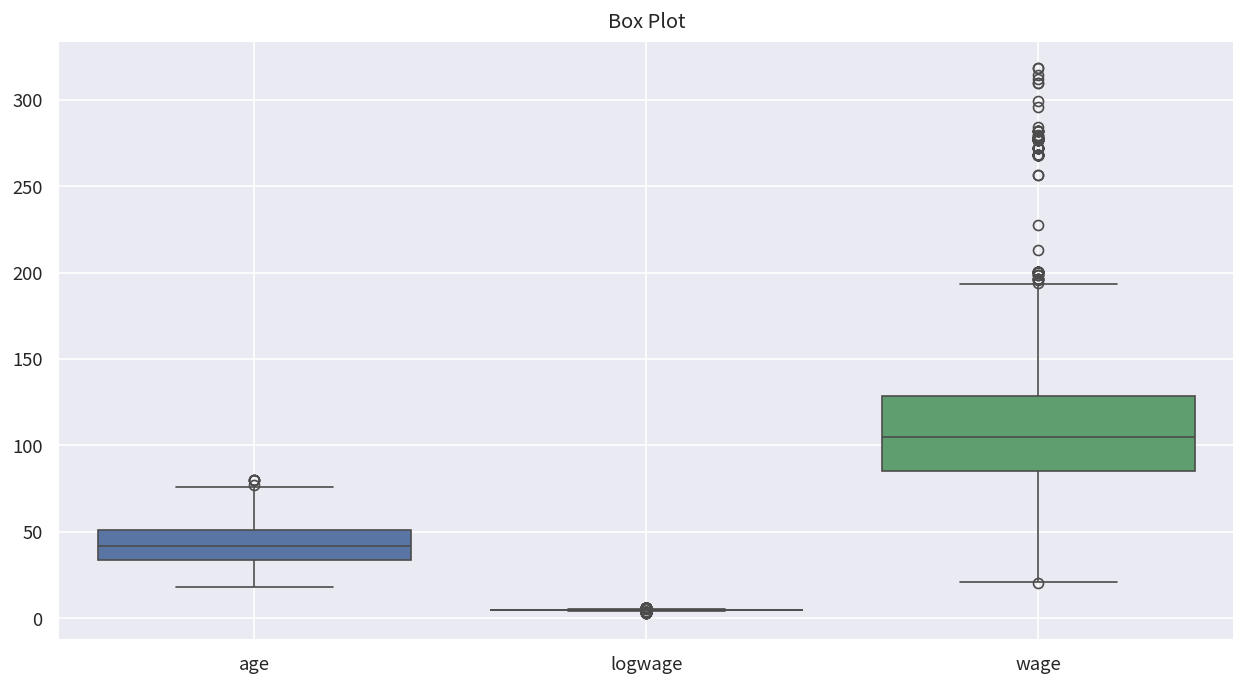

In [30]:
 #1) 그래프 초기화
width_px  = 1280  # 그래프 가로 크기
height_px = 720   # 그래프 세로 크기
rows = 1          # 그래프 행 수
cols = 1          # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

 # 2) BoxPlot 그리기
sb.boxplot(data=df1)

 # 3) 그래프 꾸미기
ax.set_title("Box Plot", fontsize=12, pad=8)
ax.grid(True)  
         
# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료

#### 4-2 상자그림 개별 표시

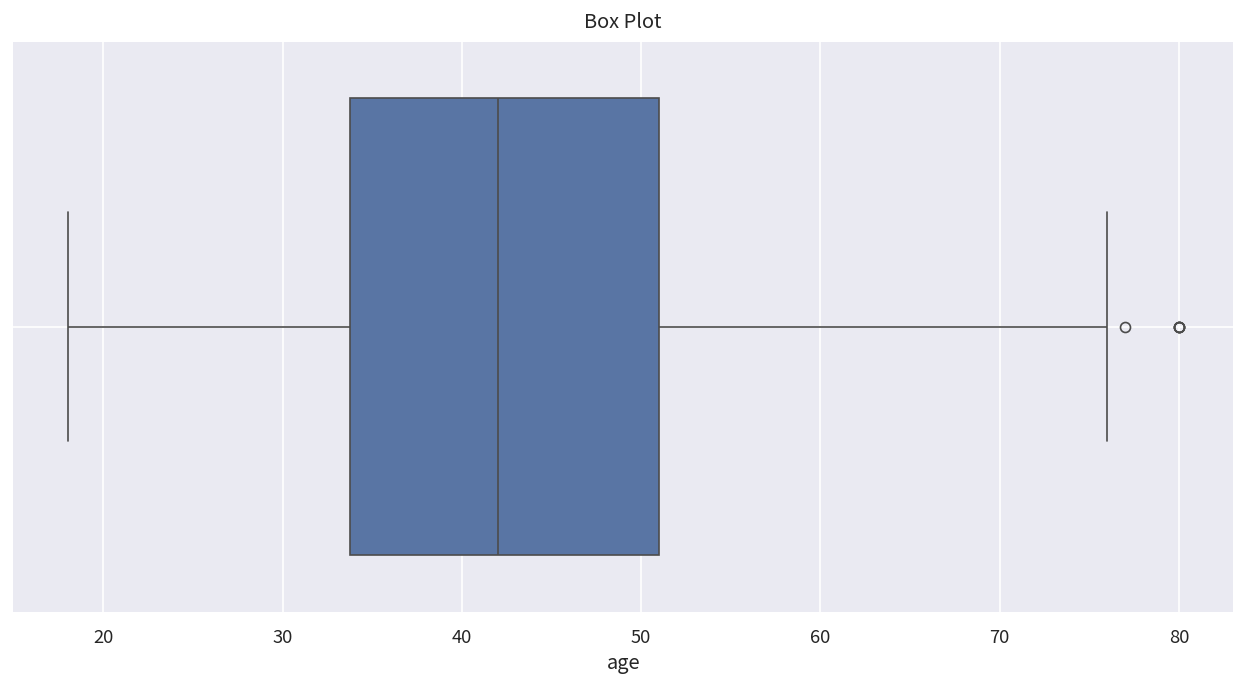

In [31]:
 #1) 그래프 초기화
width_px  = 1280  # 그래프 가로 크기
height_px = 720   # 그래프 세로 크기
rows = 1          # 그래프 행 수
cols = 1          # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

 # 2) BoxPlot 그리기
sb.boxplot(data=df1,x='age')

 # 3) 그래프 꾸미기
ax.set_title("Box Plot", fontsize=12, pad=8)
ax.grid(True)  
         
# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료

#### 반복문 활용해서 한번에 보기

- 조사 인원은 3000명이다.
- 조사 인원의 연령은 18세~80세 까지 이고, 평균 연령은 42.4세이다.
- 조사 인원의 임금은 20~318이고, 평균 임금은 111.7, 로그 변환 값은 4.65이다.
- 연령에 대한 표준 편차는 11.5이고, 임금의 표준 편차는 41.73이다.
- 임금에 대한 표준편차가 크다.

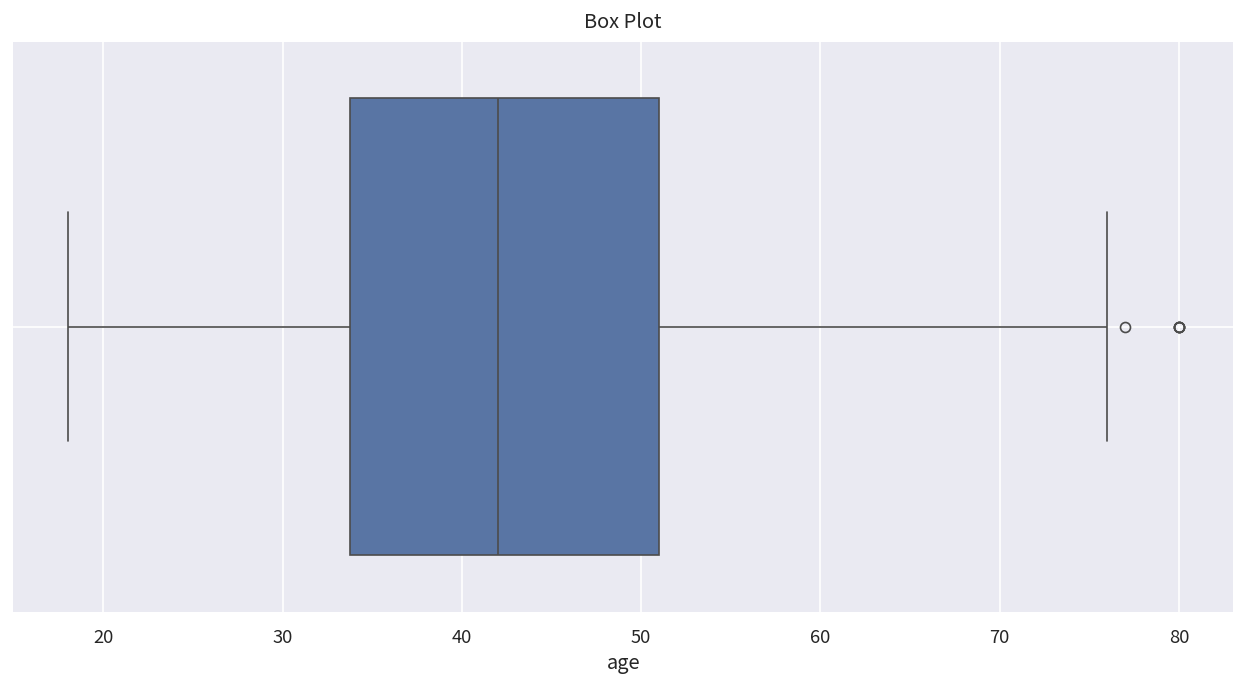

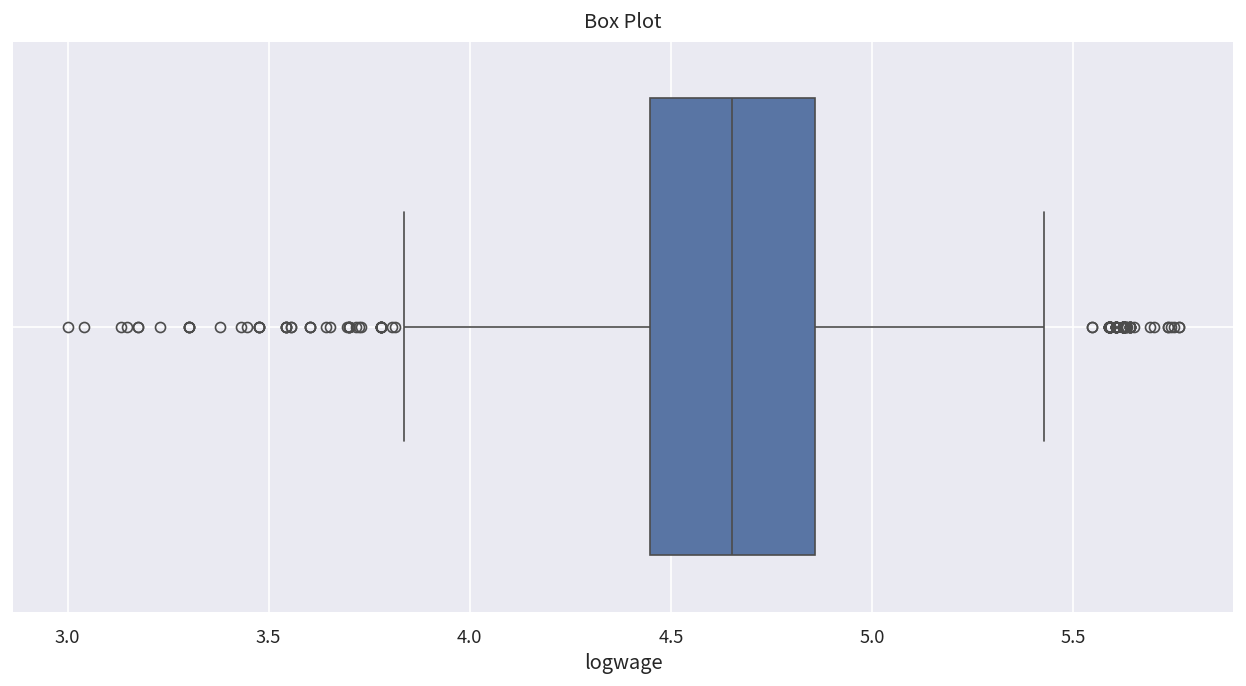

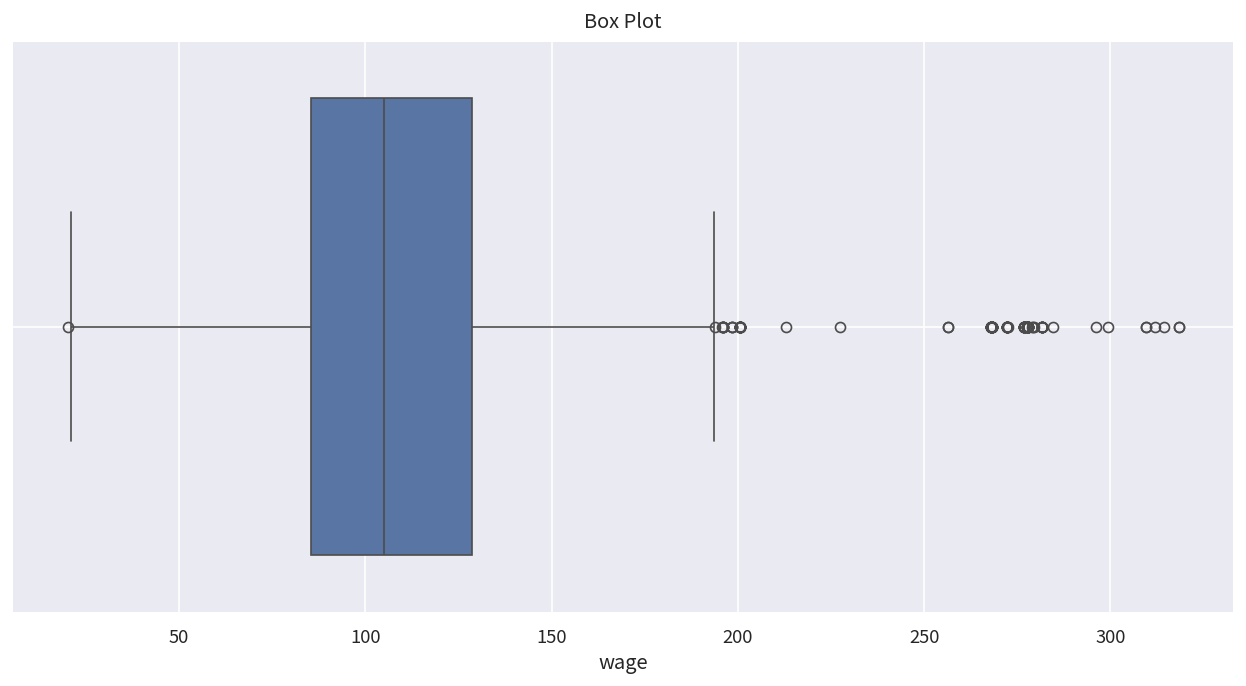

In [32]:
fields = ['age','logwage','wage']


for i in fields :
  #1) 그래프 초기화
  width_px  = 1280  # 그래프 가로 크기
  height_px = 720   # 그래프 세로 크기
  rows = 1          # 그래프 행 수
  cols = 1          # 그래프 열 수
  figsize = (width_px / my_dpi, height_px / my_dpi)
  fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

  # 2) BoxPlot 그리기
  sb.boxplot(data=df1,x=i)

  # 3) 그래프 꾸미기
  ax.set_title("Box Plot", fontsize=12, pad=8)
  ax.grid(True)  
          
  # 4) 출력
  plt.tight_layout()      # 여백 제거
  plt.show()              # 그래프 화면 출력
  plt.close()             # 그래프 작업 종료

### #05.명목형 변수의 데이터 분포 확인
- 명목형의 분포는 집단별 데이터 수를 집계하는 것으로 표현된다


- 기혼자가 그렇지 않은 사람보다 많다.
- 백인이 다른 인종보다 더 많다.
- 고등학교 졸업(HS Grad)가 가장 많고 그 다음으로 많은 경우는 대학교 졸업(College Grad), 대학교
- 중퇴(Some Colleage), 대학원 졸업(Advanced Degree) 순이다. 일부 고등학교 미만의 학력도 보인
다. 
- 조사 지역은 중앙 대서양 연안으로만 한정되어 있다.\
- 직군은 생산직과 사무직이 비슷한 비율로 분포되어 있지만 생산직이 약간 더 많은 비율을 차지한다.
- 건강상태는 대부분의 조사 대상이 좋은 상태를 보이고 있다.
- 건강 보험은 대부분의 조사 대상이 가입되어 있다.


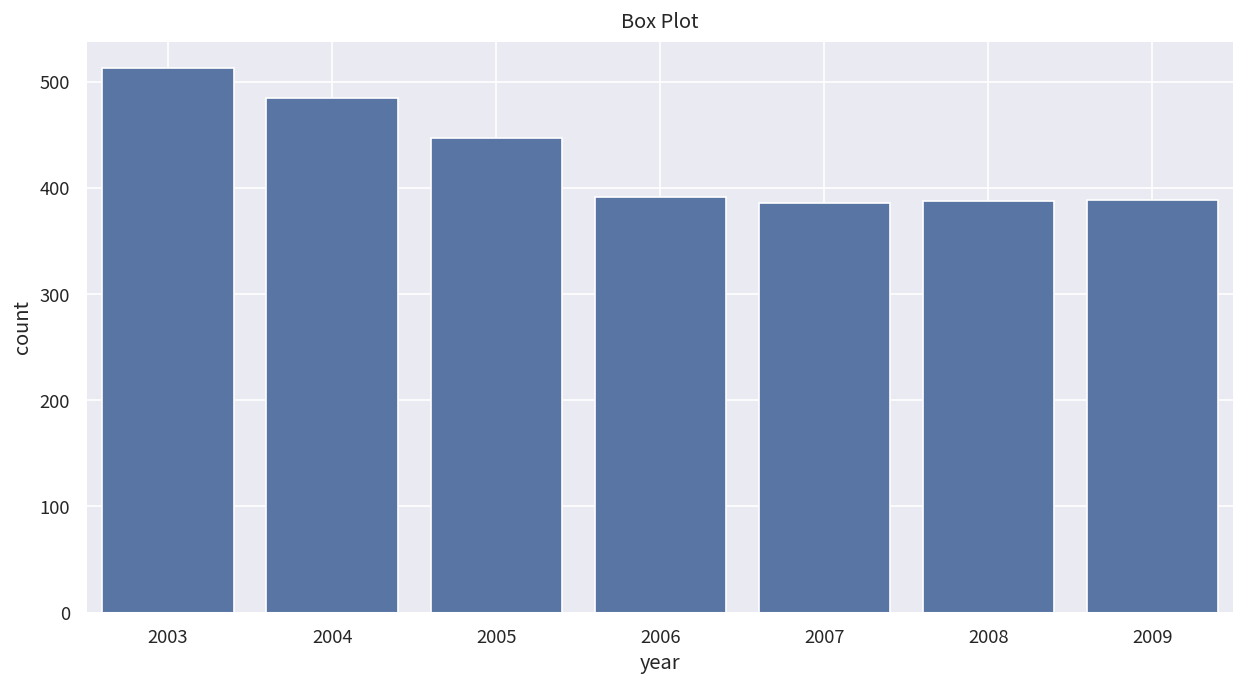

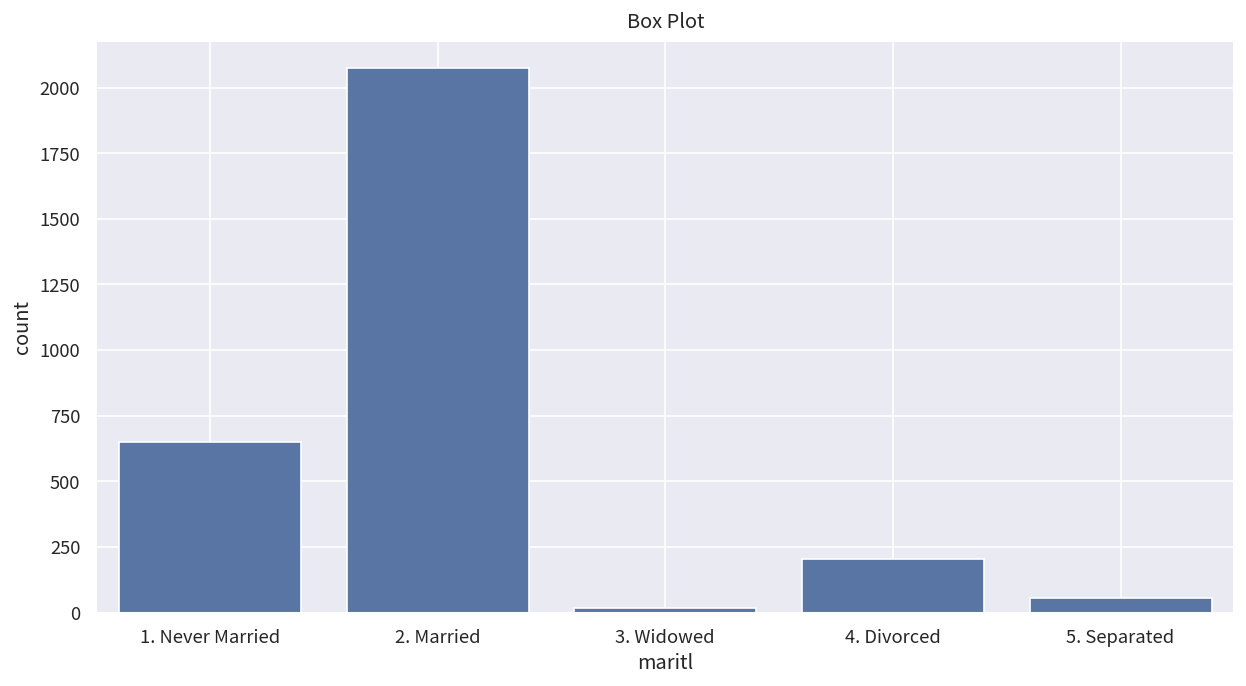

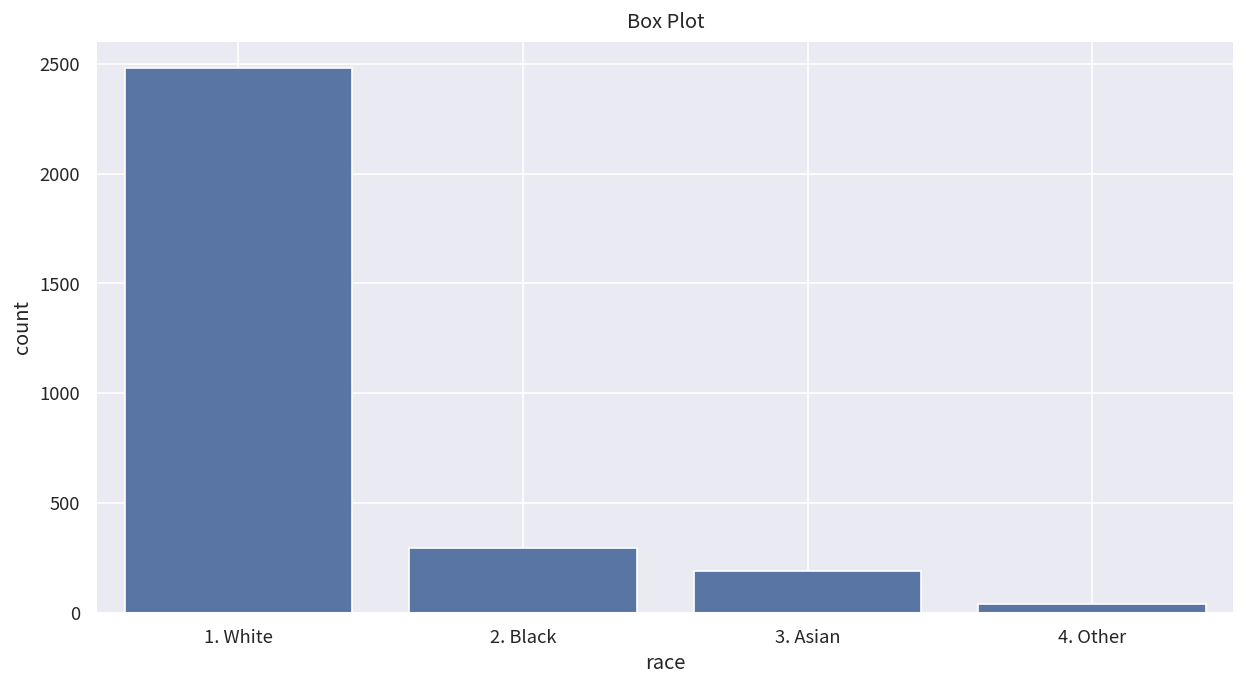

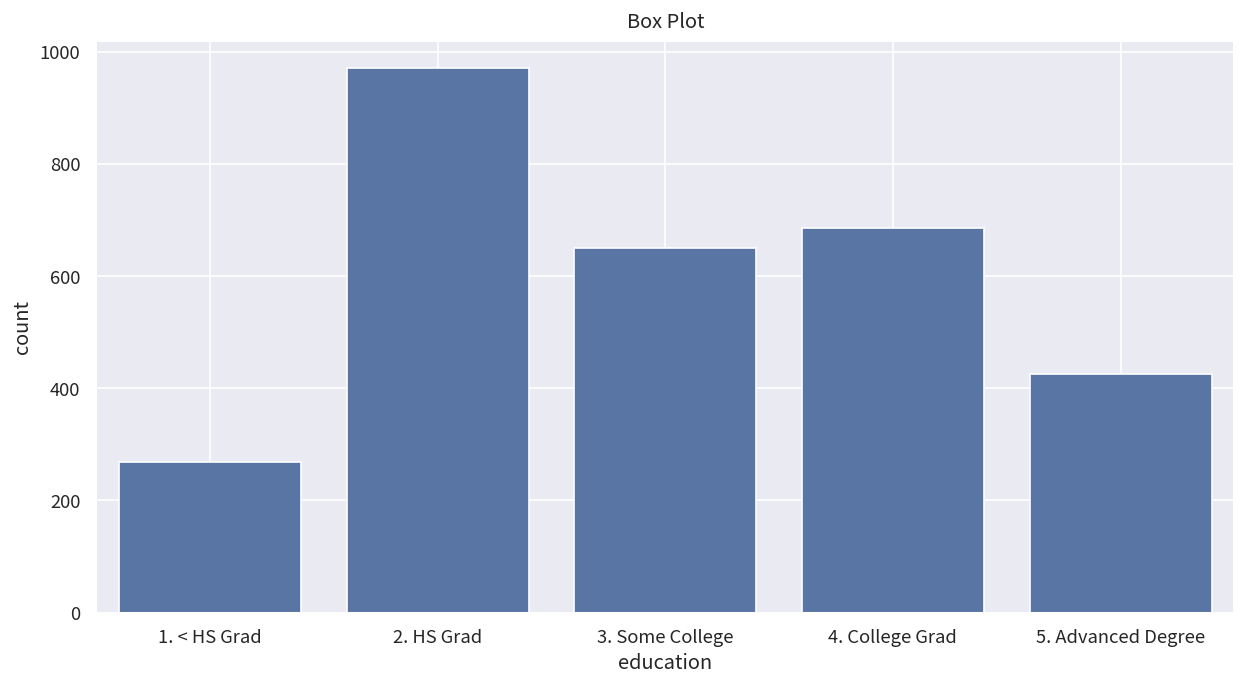

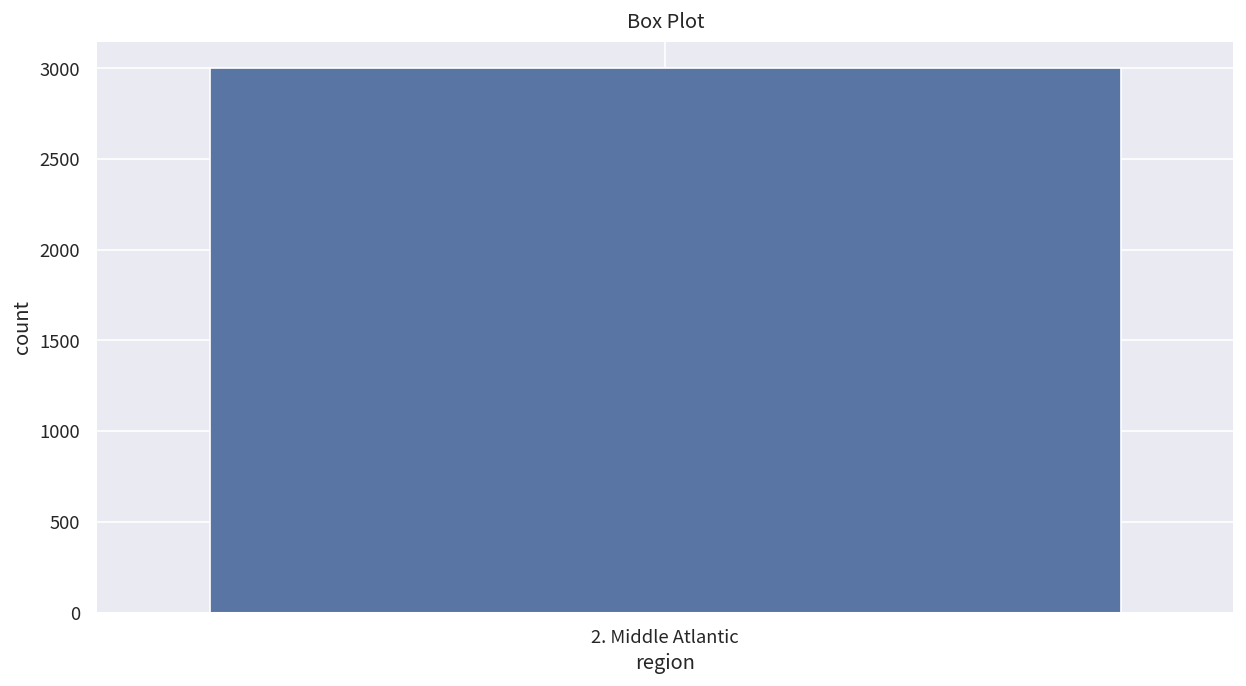

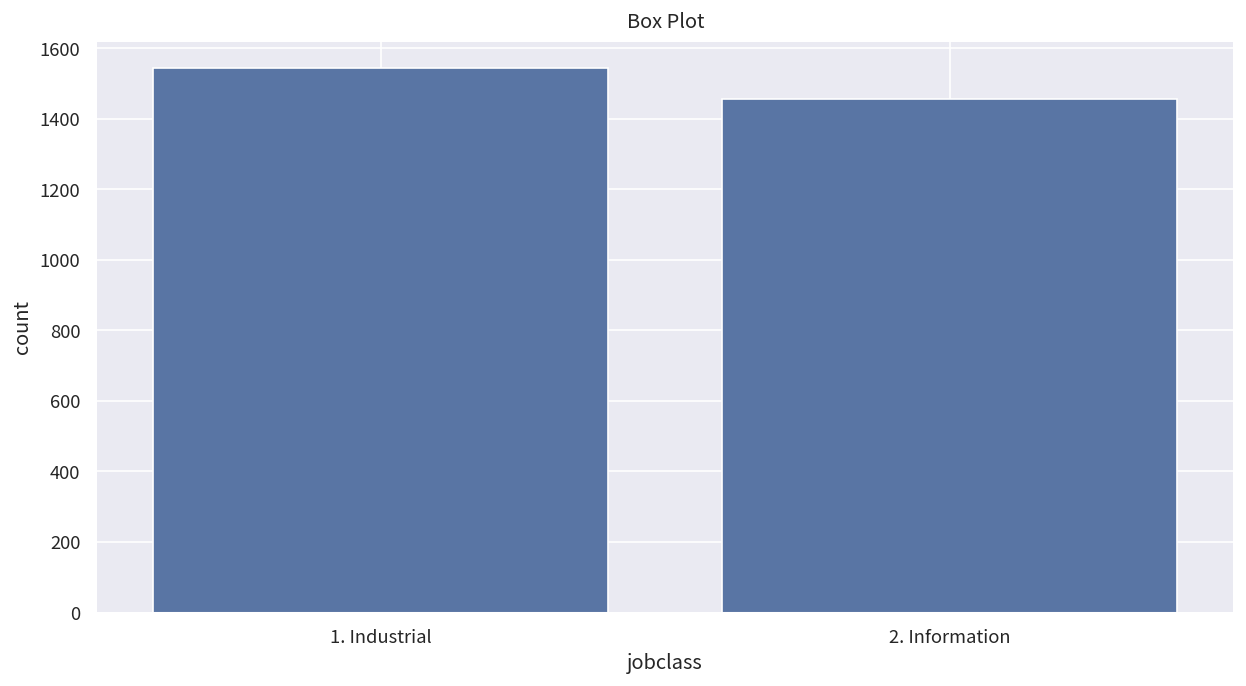

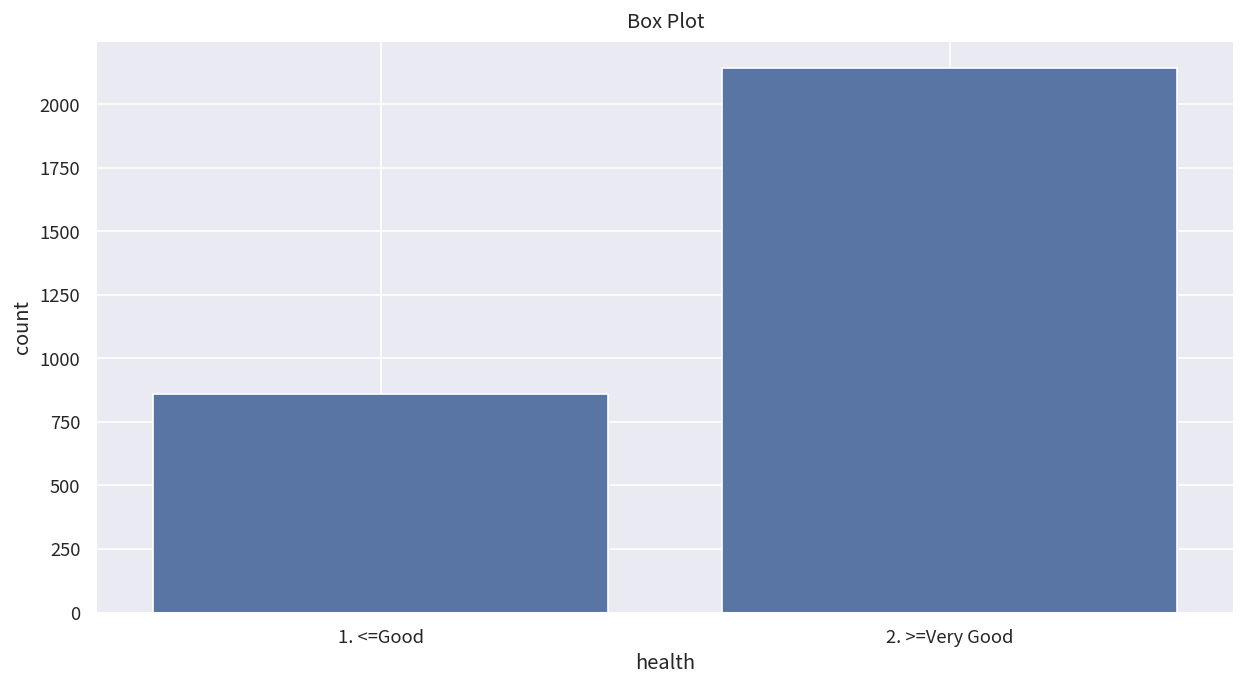

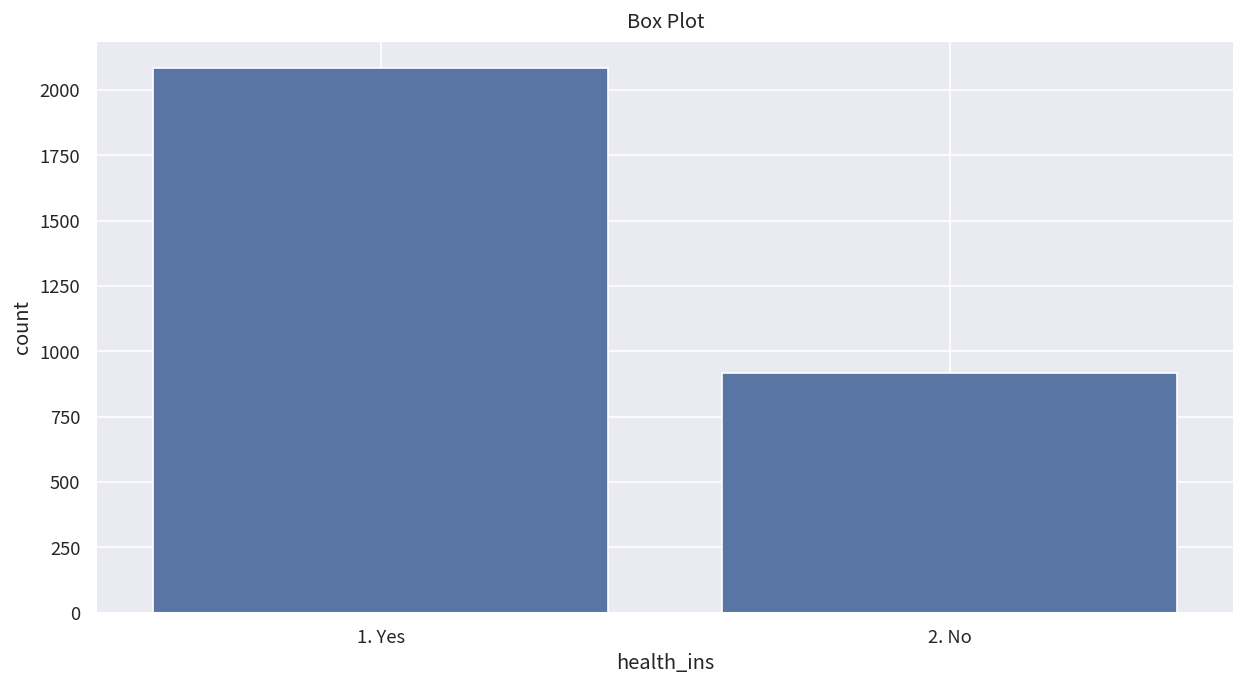

In [33]:
fields = ['year', 'maritl', 'race', 'education', 'region', 
'jobclass', 'health', 'health_ins']


for i in fields :
  #1) 그래프 초기화
  width_px  = 1280  # 그래프 가로 크기
  height_px = 720   # 그래프 세로 크기
  rows = 1          # 그래프 행 수
  cols = 1          # 그래프 열 수
  figsize = (width_px / my_dpi, height_px / my_dpi)
  fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

  # 2) BoxPlot 그리기
  sb.countplot(data=df1,x=i)

  # 3) 그래프 꾸미기
  ax.set_title("Box Plot", fontsize=12, pad=8)
  ax.grid(True)  
          
  # 4) 출력
  plt.tight_layout()      # 여백 제거
  plt.show()              # 그래프 화면 출력
  plt.close()             # 그래프 작업 종료

### #06.결혼 여부에 따른 임금 수준 비교
- 결혼 여부에 따라 임금 수준을 히스토그램으로 비교하기

In [34]:
married = sorted(list(df1['maritl'].unique()))
married

['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']

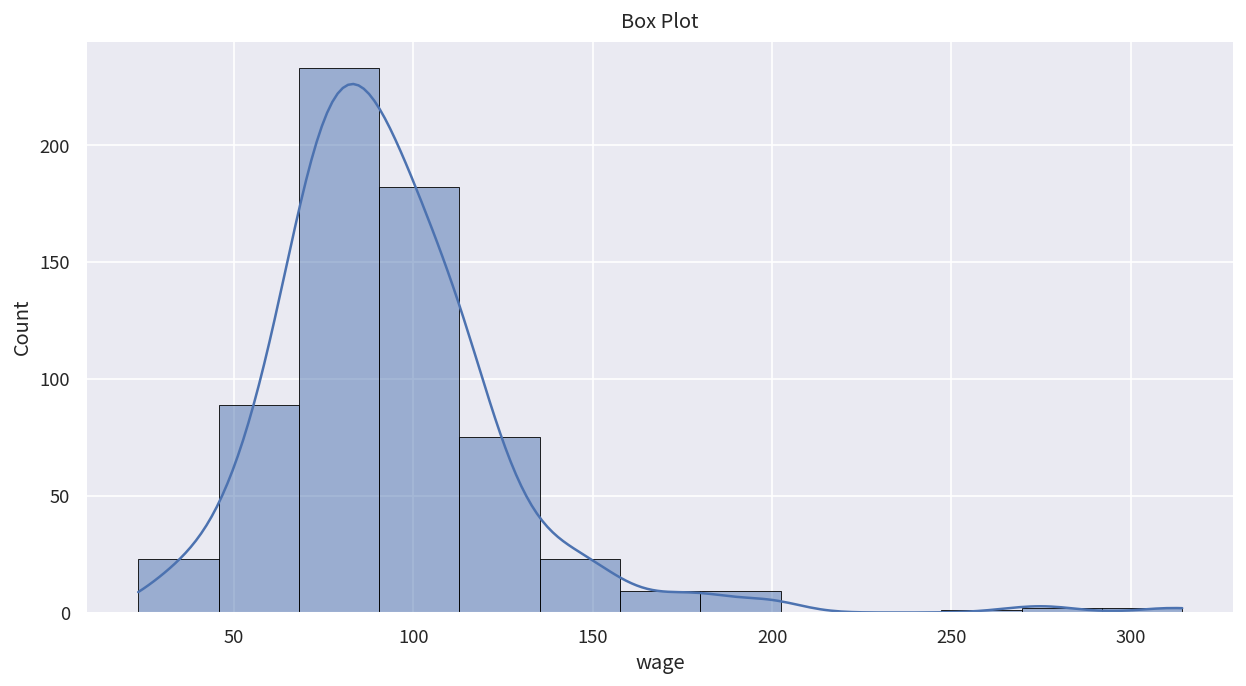

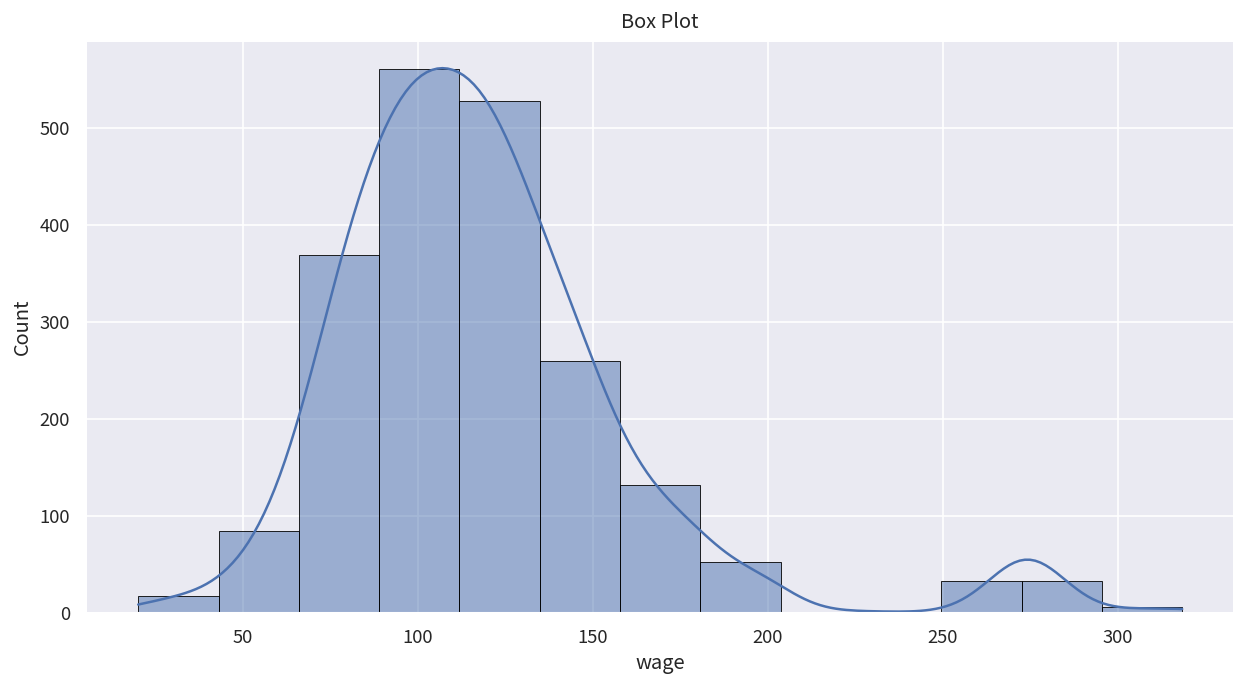

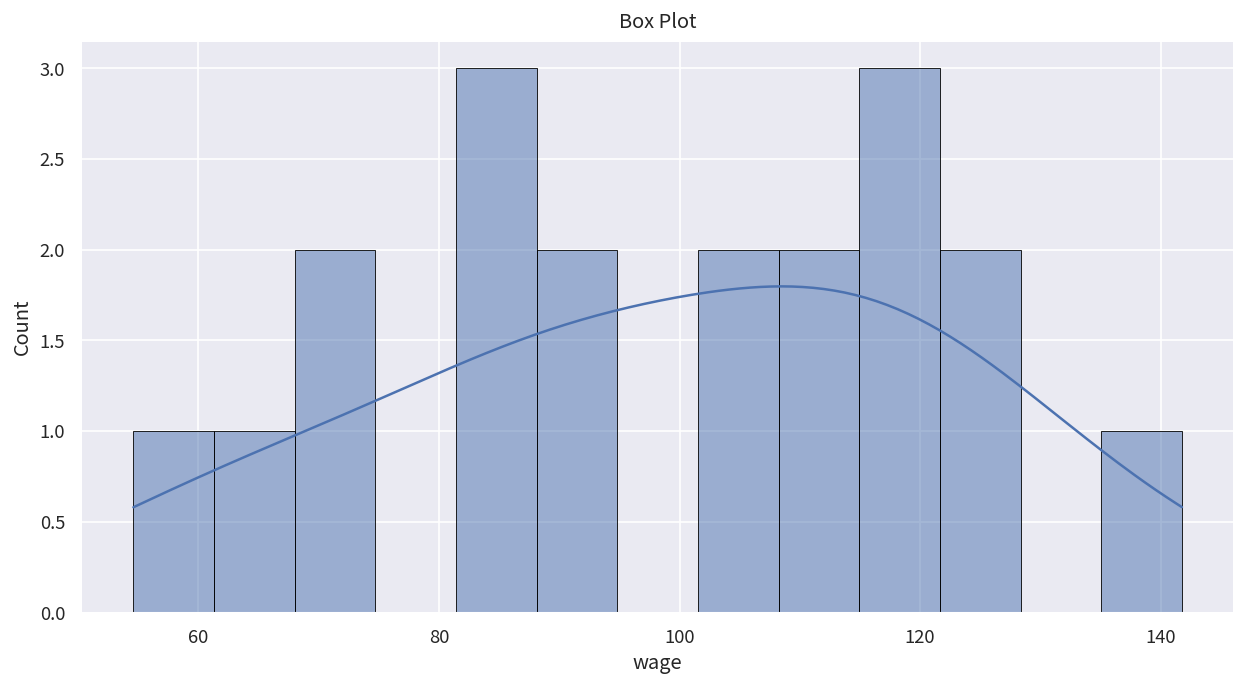

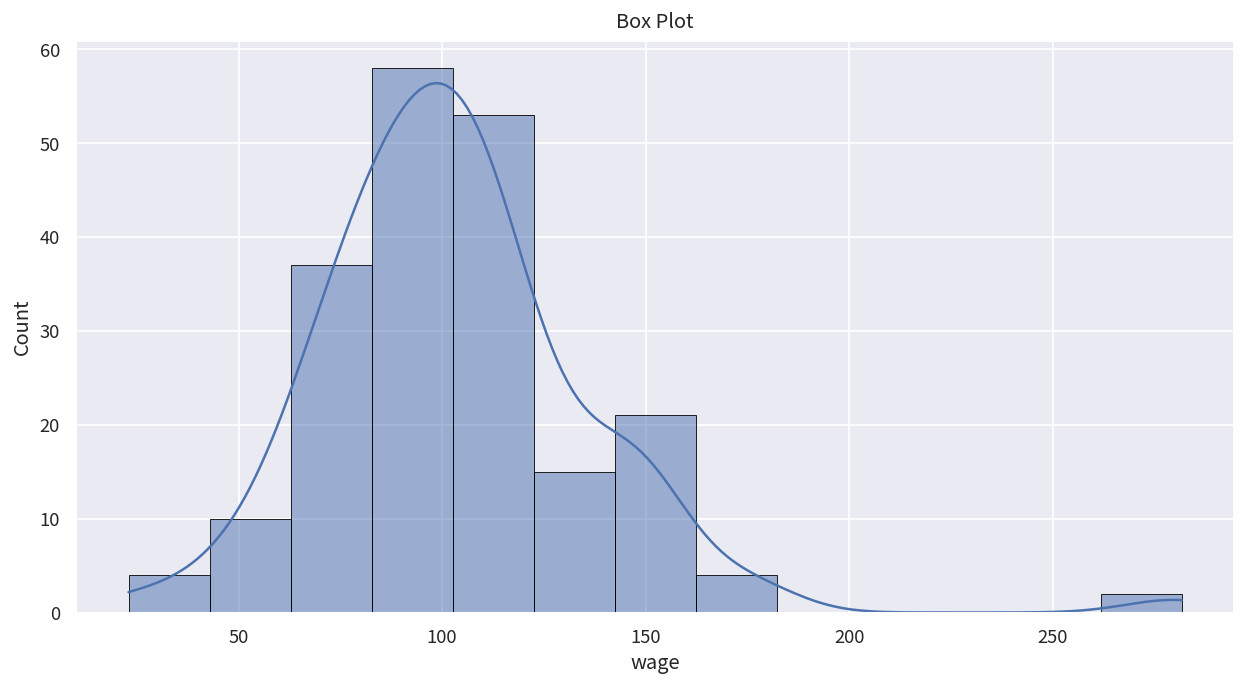

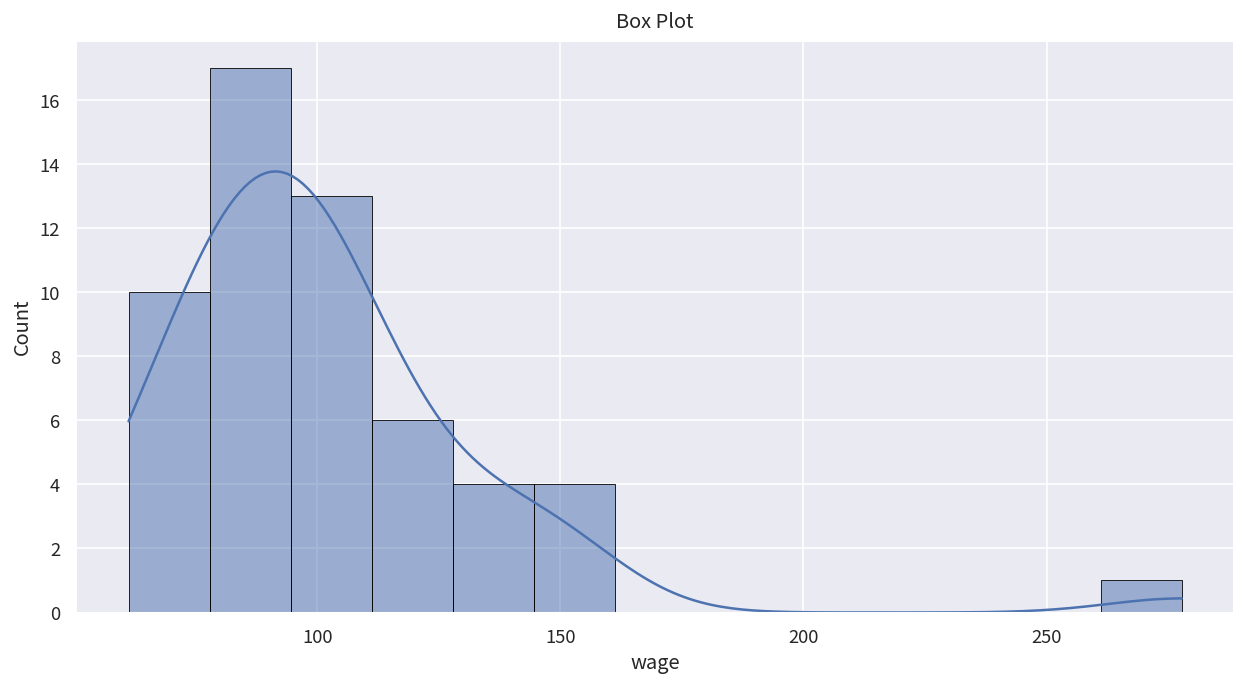

In [35]:
bins_count = 13 #13개 구간으로 나누기

for m in married :
  mdf = df1.query('maritl == @m')

  #1) 그래프 초기화
  width_px  = 1280  # 그래프 가로 크기
  height_px = 720   # 그래프 세로 크기
  rows = 1          # 그래프 행 수
  cols = 1          # 그래프 열 수
  figsize = (width_px / my_dpi, height_px / my_dpi)
  fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

  # 2) KDE Plot 그리기
  sb.histplot(data=mdf , x='wage', bins=bins_count,edgecolor = '#000000',linewidth = 0.5 ,kde=True)

  # 3) 그래프 꾸미기
  ax.set_title("Box Plot", fontsize=12, pad=8)
  ax.grid(True)  
          
  # 4) 출력
  plt.tight_layout()      # 여백 제거
  plt.show()              # 그래프 화면 출력
  plt.close()             # 그래프 작업 종료

<알 수 있는 사실>
1. Never Married /  Married
미혼인 경우보다는 기혼인 경우의 소득 수준이 더 높으며 미혼인 고액소득자보다 기혼인 고액
소득자가 더 많다.

2. Widowed
미망인의 경우도 미혼인 경우보다는 소득 수준이 높은 것으로 나타났다.

3. Divorced /  Separated
이혼 혹은 별거의 경우 미혼인 경우보다도 소득수준이 낮은 것으로 나타났다.

### #07.교육 수준에 따른 임금 수준 비교

In [36]:
education = sorted(list(df1['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

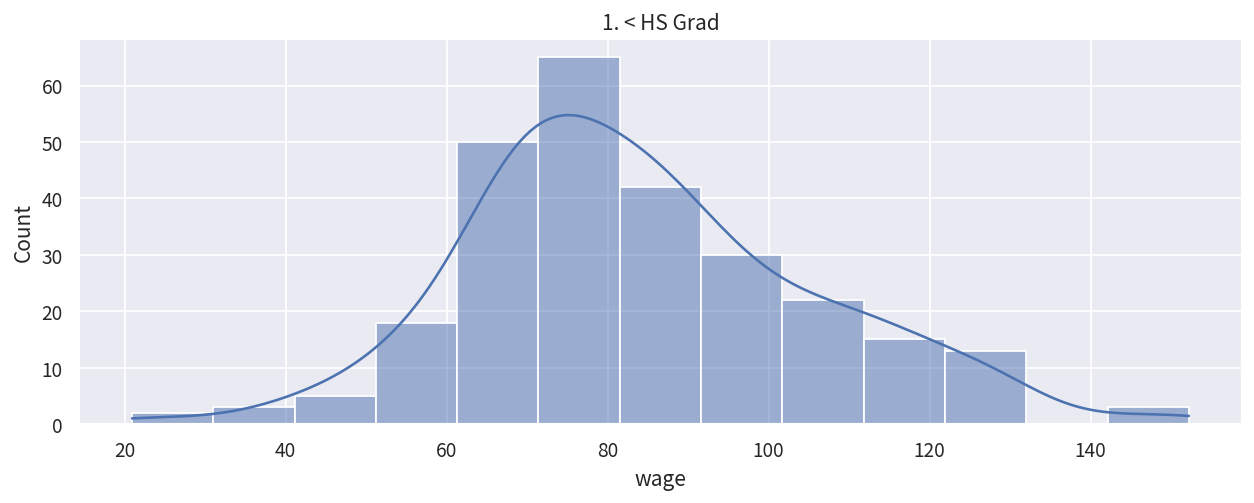

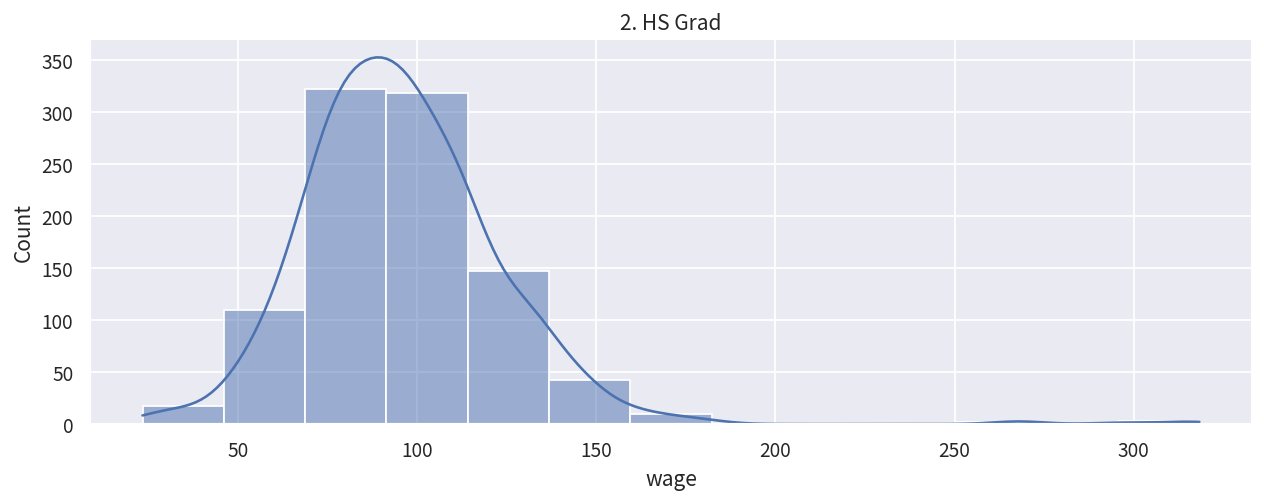

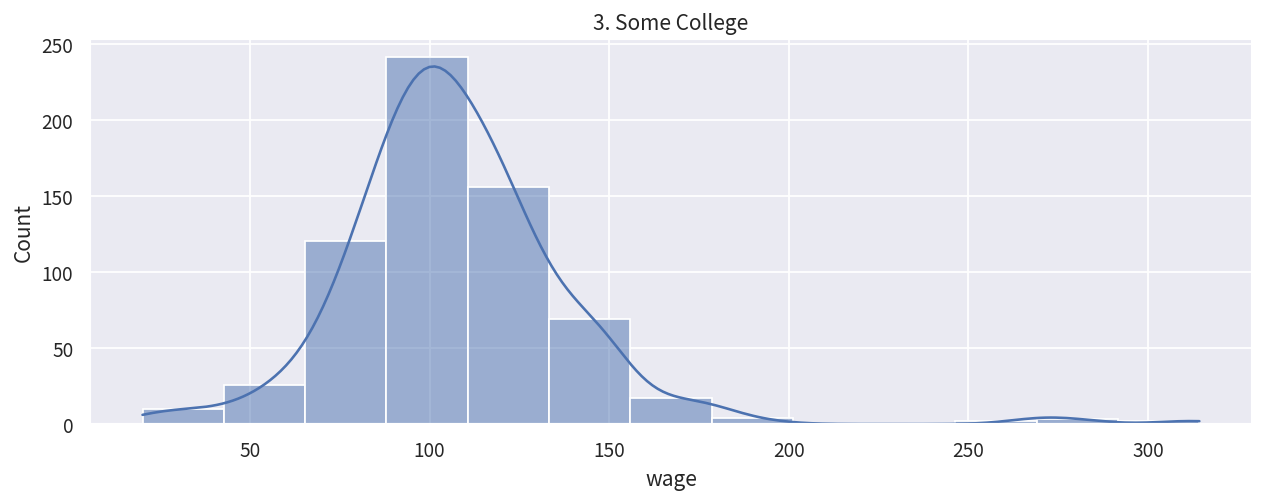

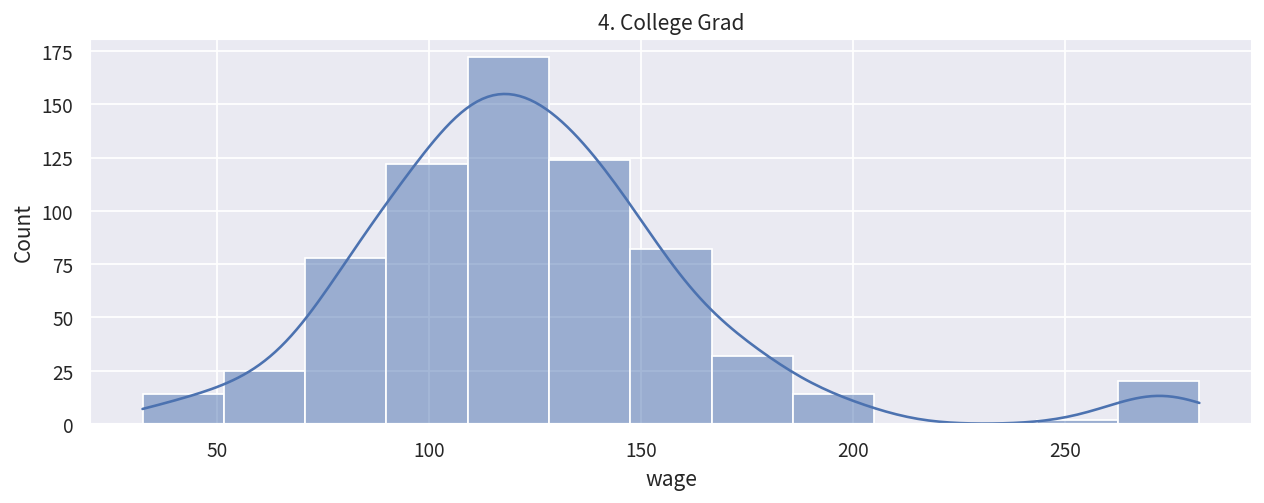

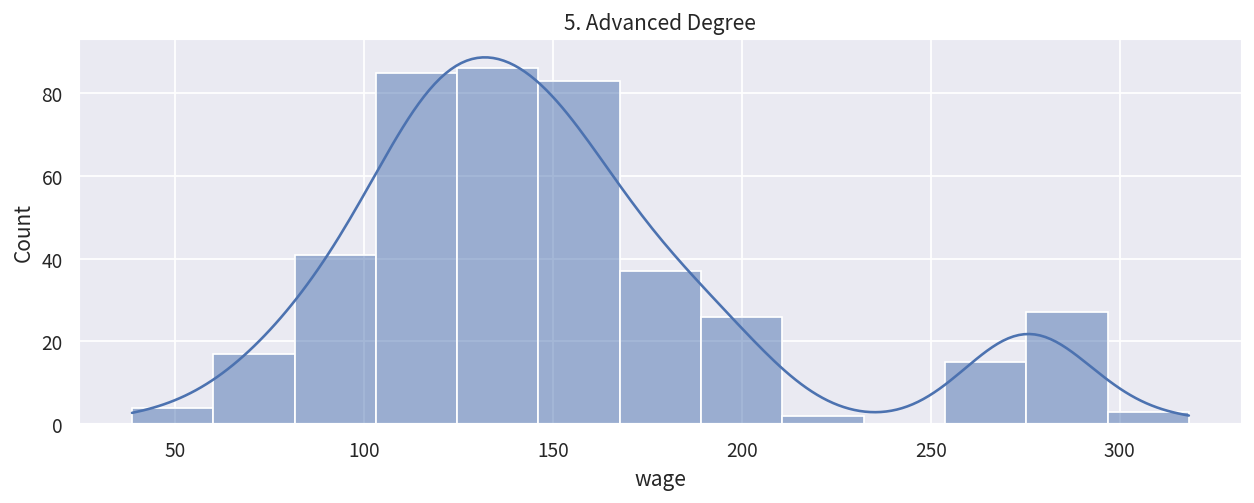

In [38]:
bins_count = 13 #13개 구간으로 나누기

for e in education :
  mdf = df1.query('education == @e')

  plt.figure(figsize=(12, 4), dpi=125)
  sb.histplot(data=mdf, x='wage', bins=bins_count, kde=True)
  plt.title(e)
  plt.grid()
  plt.show()
  plt.close()

<알 수 있는 사실>
교육 수준이 높을 수록 소득수준도 높다

### #08.직군별 건강 상태 확인

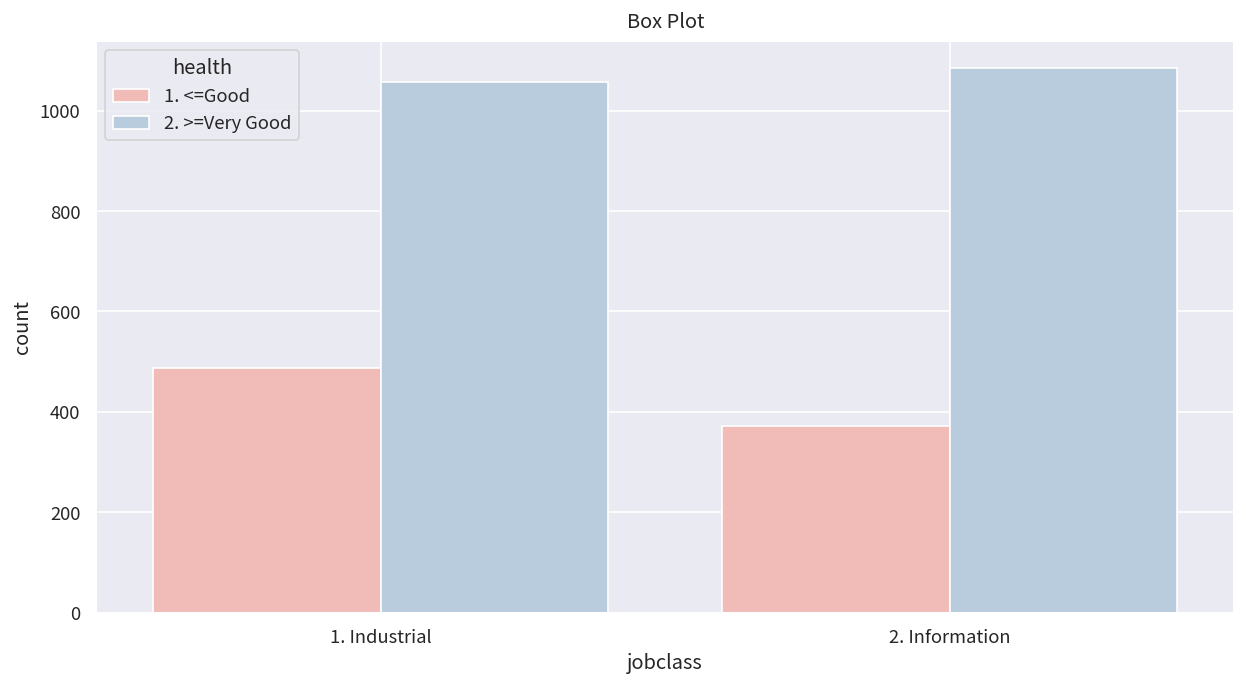

In [39]:
#1) 그래프 초기화
width_px  = 1280  # 그래프 가로 크기
height_px = 720   # 그래프 세로 크기
rows = 1          # 그래프 행 수
cols = 1          # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi=my_dpi)

# 2) count xPlot 그리기
sb.countplot(data=df1,x='jobclass',hue ='health',palette ='Pastel1')

# 3) 그래프 꾸미기
ax.set_title("Box Plot", fontsize=12, pad=8)
ax.grid(True)  
      
# 4) 출력
plt.tight_layout()      # 여백 제거
plt.show()              # 그래프 화면 출력
plt.close()             # 그래프 작업 종료

<알 수 있는 사실>
대부분 근로자의 건강상태가 좋은 편이지만 평균 이하의 건강상태를 보이는 근로자는 생산직군에 더 많
이 분포되어 있다.
